# POLISCI 3 Fall 2021

## Week 10 Sandbox Notebook

In [1]:
library(ggplot2)
data <- read.csv('broockman_skovron.csv')
head(data)

,republican,incumbent,marriage_perception,marriage_opinion,religexempt_perception,religexempt_opinion,gunsbanassault_perception,gunsbanassault_opinion
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,0,50,69,60,34,70,70
2,1,0,10,48,60,49,10,46
3,1,1,25,53,65,46,NA,58
4,0,0,50,67,30,38,NA,70
5,1,0,25,52,70,44,NA,60
6,0,1,NA,71,NA,35,NA,69


Here is an overview of what the columns in the dataset represent: 

- `republican`: whether the state legislator or state legislative candidate who answered the survey was a Republican (1 = Republican, 0 = Democrat)
- `incumbent`: whether the person who answered the survey was an incumbent representative (i.e., currently holds political office) (1 = already holds office, 0 = just a candidate)
- `marriage_perception`: what percent of the politician's constituents they think support same-sex marriage
- `marriage_opinion`: what percent of the politician's constituents actually support same-sex marriage
- `religexempt_perception`: what percent of the politician's constituents they think support allowing employers to refuse to cover birth control for employees if it violates their religious beliefs
- `religexempt_opinion`: what percent of the politician's constituents actually support allowing employers to refuse to cover birth control for employees if it violates their religious beliefs
- `gunsbanassault_perception`: what percent of the politician's constituents they think support banning assault weapons
- `gunsbanassault_opinion`: what percent of the politician's constituents actually support banning assault weapons

In [3]:
# What is the average percent of the politician's constituents they think support banning assault weapons? 
# In other words, on average, how much support for banning assault weapons do politicians think there is?
avg.politician.perception <- mean(data$gunsbanassault_perception, na.rm = TRUE)
avg.politician.perception

[1] 38.37758

In [4]:
# What is the average support for banning assault weapons?
avg.constitutent.support <- mean(data$gunsbanassault_opinion, na.rm = TRUE)
avg.constitutent.support

[1] 61.15036

In [5]:
# What is the AVERAGE difference between politicians' perceptions and constituent opinion?
difference <- mean(data$gunsbanassault_perception - data$gunsbanassault_opinion, na.rm = TRUE)
difference

[1] -22.85417

In [7]:
# How do we figure out whether incumbents are better at knowing constituent opinion?
incumbents <- subset(data, incumbent == 1)
difference.incumbents <- mean(incumbents$gunsbanassault_perception - incumbents$gunsbanassault_opinion, 
                              na.rm = TRUE)

nonincumbents <- subset(data, incumbent == 0)
difference.nonincumbents <- mean(nonincumbents$gunsbanassault_perception - nonincumbents$gunsbanassault_opinion, 
                              na.rm = TRUE)

difference.incumbents
difference.nonincumbents

#an alternative way to get the same answer
library(estimatr)
data$difference <- data$gunsbanassault_perception - data$gunsbanassault_opinion
difference_in_means(difference ~ incumbent, data)

[1] -19.9863

[1] -24.61345

Design:  Standard 
          Estimate Std. Error  t value    Pr(>|t|) CI Lower CI Upper       DF
incumbent 4.627144   1.522081 3.040012 0.002464069 1.638163 7.616125 628.3975

Warning message:
“Removed 790 rows containing missing values (geom_point).”


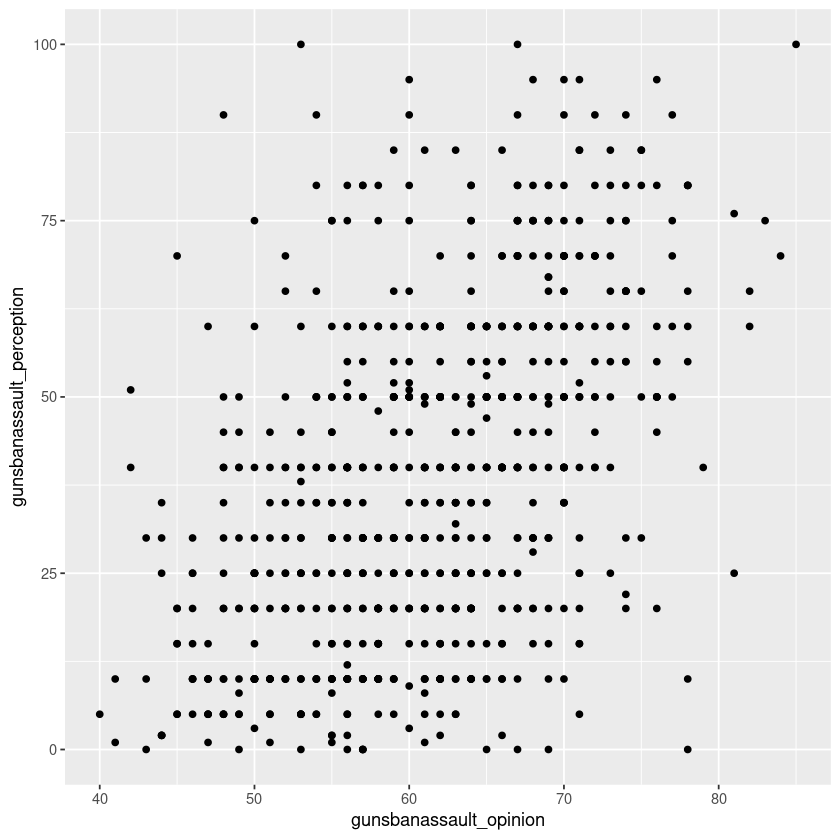

In [8]:
# Plot the relationship between constituent opinion (x-axis) and politician's perceptions (y-axis)
plot.gunban <- qplot(gunsbanassault_opinion, gunsbanassault_perception, data = data)
plot.gunban

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 790 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 790 rows containing missing values (geom_point).”


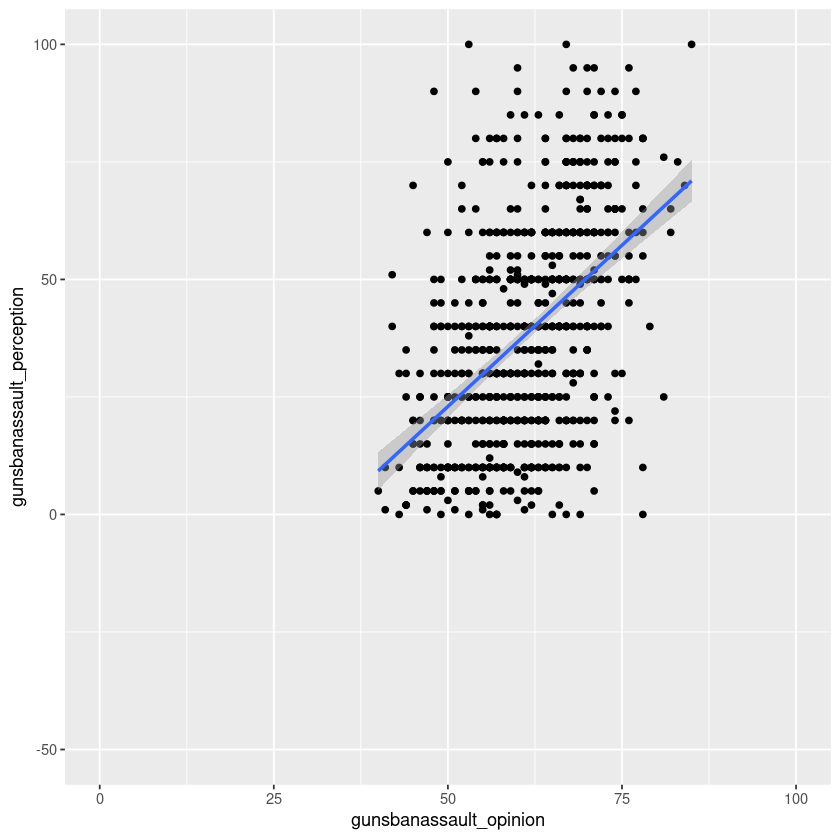

In [15]:
# Now, add a regression line and make sure the x-axis goes from 0 to 100
plot.gunban.with.lm <- plot.gunban +
geom_smooth(method = "lm") +
xlim(0, 100) +
ylim(-50, 100) 
plot.gunban.with.lm

In [10]:
# Let's compute the bivariate regression.
summary(lm(gunsbanassault_perception ~ gunsbanassault_opinion, data = data))


Call:
lm(formula = gunsbanassault_perception ~ gunsbanassault_opinion, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-61.377 -15.248  -1.111  13.712  72.915 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -45.61548    5.57700  -8.179 1.18e-15 ***
gunsbanassault_opinion   1.37170    0.09027  15.196  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.51 on 766 degrees of freedom
  (790 observations deleted due to missingness)
Multiple R-squared:  0.2316,	Adjusted R-squared:  0.2306 
F-statistic: 230.9 on 1 and 766 DF,  p-value: < 2.2e-16


In [16]:
# How do we find the predicted level of politicians' perceptions of constituent support for the ban on assault weapons 
# when constituent support is at 75%?
predicted.perception.75 <- -45.62 + 1.37*75
predicted.perception.75

[1] 57.13

In [17]:
# How do we find the predicted level of politicians' perceptions of constituent support the ban on assault weapons
# when constituent support is one standard deviation above the mean?
mean.plus.sd <- mean(data$gunsbanassault_opinion, na.rm = TRUE) + sd(data$gunsbanassault_opinion, na.rm = TRUE)
mean.plus.sd 

predicted.perception.mean.plus.sd <- -45.62 + 1.37*mean.plus.sd
predicted.perception.mean.plus.sd

[1] 69.52986

[1] 49.6359

In [18]:
# How do we find the correlation?
correlation <- sqrt(0.2316)
correlation

[1] 0.4812484